False
1    150
0    150
Name: HeartDisease, dtype: int64
     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
14  0.74 0.00             1.00 0.67         0.54          0.00         1.00   
12  0.57 1.00             0.75 0.73         0.42          0.00         1.00   
238 0.61 1.00             0.75 0.72         0.46          0.00         1.00   
124 0.70 1.00             0.75 0.65         0.48          0.00         1.00   
157 0.58 1.00             0.50 0.67         0.55          0.00         1.00   

     Max HR  Exercise angina  ST depression  Slope of ST  \
14     0.79             0.00           0.00         0.33   
12     0.89             0.00           0.00         0.33   
238    0.77             0.00           0.00         0.33   
124    0.75             0.00           0.08         1.00   
157    0.84             0.00           0.00         0.33   

     Number of vessels fluro  Thallium  HeartDisease  
14                      0.33      0.43          0.00

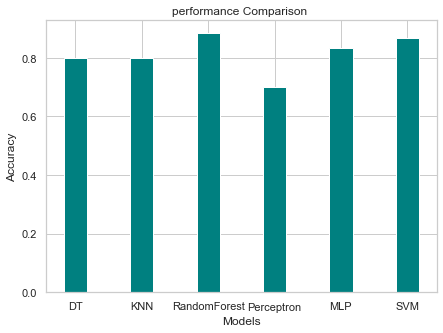

In [106]:
from cgi import print_arguments
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import  accuracy_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from  sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


data = pd.read_csv("Heart_Disease_Prediction.csv")
# print(data.shape)
# print(data.head())

print(data.isnull().values.any())
data=data.drop_duplicates()

data.HeartDisease = [1 if i == "Presence" else 0 for i in data.HeartDisease]

data= shuffle(data)

# class_le = LabelEncoder()
# y = class_le.fit_transform(data.HeartDisease.values)

data_majority = data[data.HeartDisease == 0]
data_minority =  data[data.HeartDisease == 1]
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=150,    # to match majority class
                                 random_state=123) # reproducible results


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print(df_upsampled.HeartDisease.value_counts())
# print(df_upsampled.head())



# copy the data
df_max_scaled = df_upsampled.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
print(df_max_scaled.head())





x=df_max_scaled.drop(['HeartDisease'],axis=1)
y=df_max_scaled.HeartDisease.values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)




diagnosis_ClassifierDT= DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,min_samples_leaf=5)
diagnosis_ClassifierKNN= KNeighborsClassifier( n_neighbors=30)
diagnosis_ClassifierPerceptron=Perceptron(max_iter=100,random_state=0)
diagnosis_ClassifierRandomForest= RandomForestClassifier(n_estimators = 300,max_depth=10)
diagnosis_ClassifierCNN = MLPClassifier( random_state=42, max_iter=1000, warm_start=True)
diagnosis_ClassifierSVM = SVC(kernel='rbf')



#DT
diagnosis_ClassifierDT.fit(x_train, y_train)
diagnosis_predictDT = diagnosis_ClassifierDT.predict(x_test)
accDT = accuracy_score(diagnosis_predictDT, y_test)
training_accuracy = diagnosis_ClassifierDT.score(x_train, y_train)
print("DT traning= " + str(training_accuracy * 100))
print("DT testing= " + str(accDT * 100))



#KNN
diagnosis_ClassifierKNN.fit(x_train, y_train)
diagnosis_predictKNN = diagnosis_ClassifierKNN.predict(x_test)
accKNN = accuracy_score( y_test,diagnosis_predictKNN)
training_accuracy = diagnosis_ClassifierKNN.score(x_train, y_train)
print("KNN traning= " + str(training_accuracy * 100))
print("KNN testing = " + str(accKNN * 100))


#Perceptron
diagnosis_ClassifierPerceptron.fit(x_train, y_train)
diagnosis_predictPerceptron = diagnosis_ClassifierPerceptron.predict(x_test)
accP = accuracy_score( y_test,diagnosis_predictPerceptron)
training_accuracy = diagnosis_ClassifierPerceptron.score(x_train, y_train)
print("Perceptron traning= " + str(training_accuracy * 100))
print("Perceptron testing= " + str(accP * 100))


#RandomForest
diagnosis_ClassifierRandomForest.fit(x_train, y_train)
diagnosis_predictRandomForest = diagnosis_ClassifierRandomForest.predict(x_test)
accRF = accuracy_score(y_test,diagnosis_predictRandomForest)
training_accuracy = diagnosis_ClassifierRandomForest.score(x_train, y_train)
print("RandomForest traning= " + str(training_accuracy * 100))
print("RandomForest testing= " + str(accRF * 100))


#CNN
diagnosis_ClassifierCNN.fit(x_train, y_train)
diagnosis_predictCNN = diagnosis_ClassifierCNN.predict(x_test)
accCNN = accuracy_score( y_test,diagnosis_predictCNN)
training_accuracy = diagnosis_ClassifierCNN.score(x_train, y_train)
print("MLP traning= " + str(training_accuracy * 100))
print("MLP testing= " + str(accCNN * 100))

#SVM
diagnosis_ClassifierSVM.fit(x_train, y_train)
diagnosis_predictSVM = diagnosis_ClassifierSVM.predict(x_test)
accSVM = accuracy_score(diagnosis_predictSVM, y_test)
training_accuracy = diagnosis_ClassifierSVM.score(x_train, y_train)
print("SVM traning= " + str(training_accuracy * 100))
print("SVM testing= " + str(accSVM * 100))


names=['DT','KNN','RandomForest','Perceptron','MLP','SVM']
valuse=[accDT,accKNN,accRF,accP,accCNN,accSVM]

fig = plt.figure(figsize=(7,5))
ax = plt.axes()
ax.bar(names, valuse, color='teal', width = 0.35);
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('performance Comparison ');
plt.show()




<AxesSubplot:title={'center':'data disturbution after upsampling'}, xlabel='heart disease', ylabel='number of labels'>

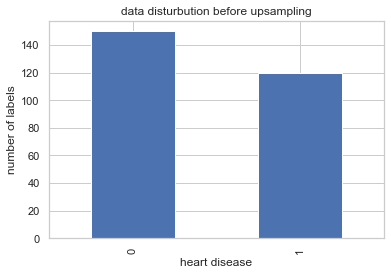

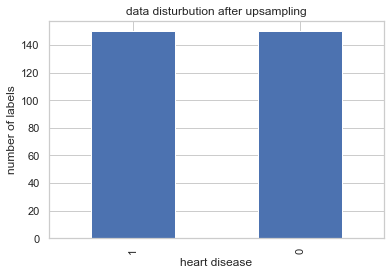

In [107]:
fig,ax=plt.subplots()
ax.set_title('data disturbution before upsampling')
ax.set_xlabel('heart disease')
ax.set_ylabel('number of labels')
label=data["HeartDisease"]
label.value_counts().plot(kind="bar")




fig,ax=plt.subplots()
ax.set_title('data disturbution after upsampling')
ax.set_xlabel('heart disease')
ax.set_ylabel('number of labels')
label=df_upsampled["HeartDisease"]
label.value_counts().plot(kind="bar")

In [41]:
#models accuracy before and after normalization 

#before

x_b=data.drop(['HeartDisease'],axis=1)
y_b=data.HeartDisease.values

xb_train,xb_test,yb_train,yb_test=train_test_split(x_b,y_b,test_size=0.2)
diagnosis_ClassifierKNNb= KNeighborsClassifier( n_neighbors=30)
diagnosis_ClassifierCNNb = MLPClassifier( random_state=42, max_iter=1000, warm_start=True)




#KNN
diagnosis_ClassifierKNNb.fit(xb_train, yb_train)
diagnosis_predictKNNb = diagnosis_ClassifierKNNb.predict(xb_test)
accKNNb = accuracy_score( yb_test,diagnosis_predictKNNb)
training_accuracy = diagnosis_ClassifierKNNb.score(xb_train, yb_train)
print("KNN traning= " + str(training_accuracy * 100))
print("KNN testing = " + str(accKNNb * 100))


#CNN
diagnosis_ClassifierCNNb.fit(xb_train, yb_train)
diagnosis_predictCNNb = diagnosis_ClassifierCNNb.predict(xb_test)
accCNNb = accuracy_score(yb_test,diagnosis_predictCNNb)
training_accuracy = diagnosis_ClassifierCNNb.score(xb_train, yb_train)
print("MLP traning= " + str(training_accuracy * 100))
print("MLP testing= " + str(accCNNb * 100))



KNN traning= 65.27777777777779
KNN testing = 68.51851851851852
MLP traning= 80.55555555555556
MLP testing= 81.48148148148148


In [42]:
accCNNb

0.8148148148148148

Text(0, 0.5, 'Accuracy')

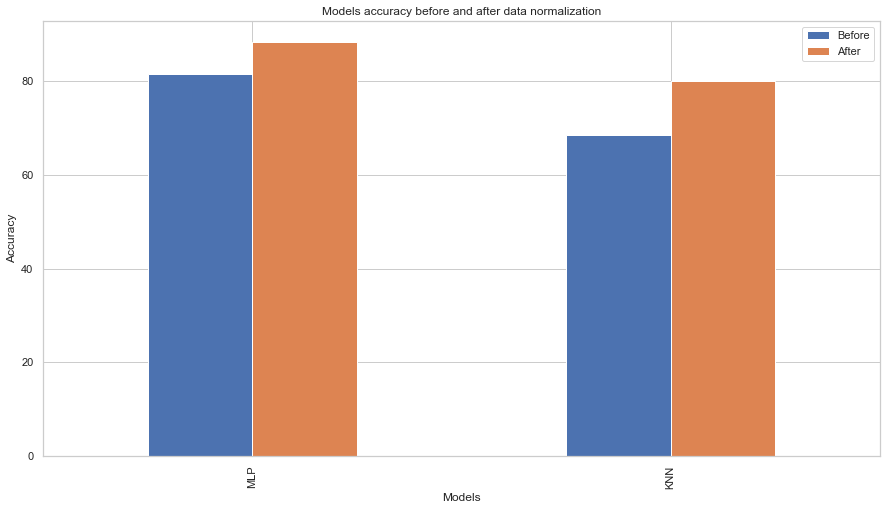

In [43]:

plotdata = pd.DataFrame({

    "Before":[accCNNb * 100,accKNNb * 100],

    "After":[accCNN * 100,accKNN*100]},

    index=["MLP", "KNN"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Models accuracy before and after data normalization")

plt.xlabel("Models")

plt.ylabel("Accuracy")

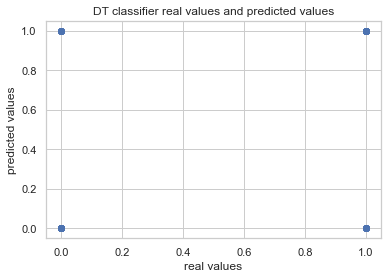

<Figure size 1152x648 with 0 Axes>

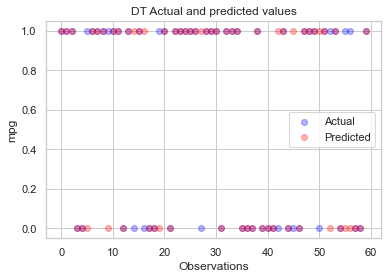

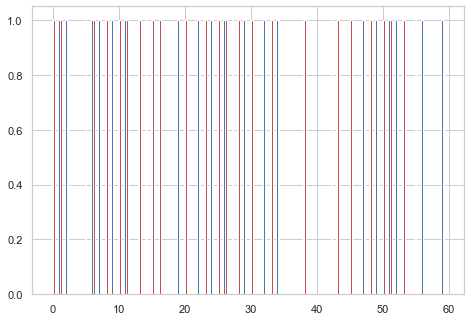

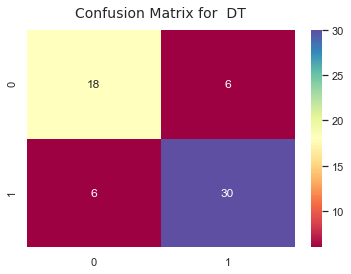

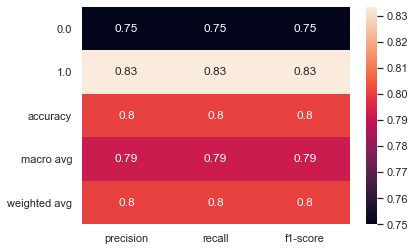

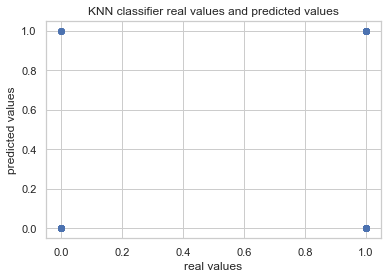

<Figure size 1152x648 with 0 Axes>

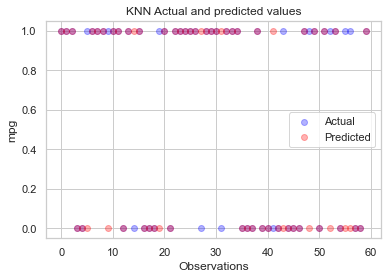

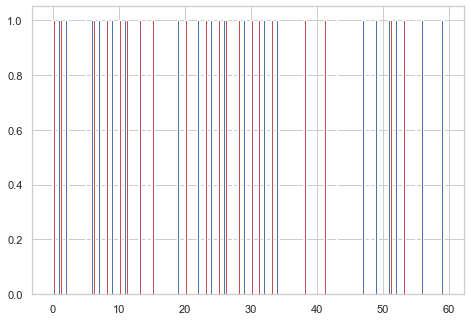

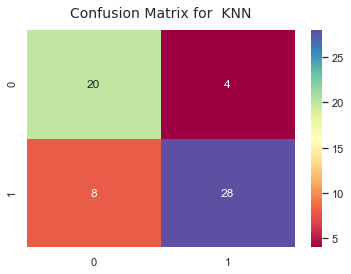

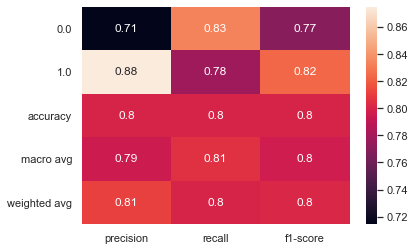

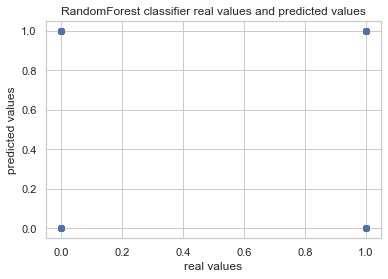

<Figure size 1152x648 with 0 Axes>

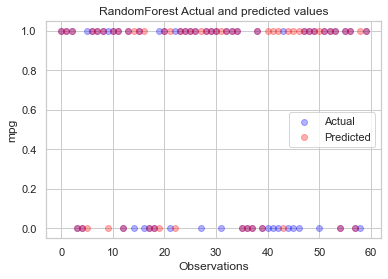

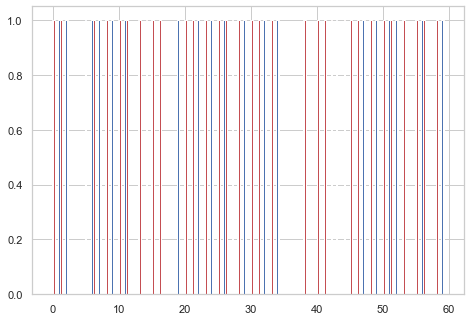

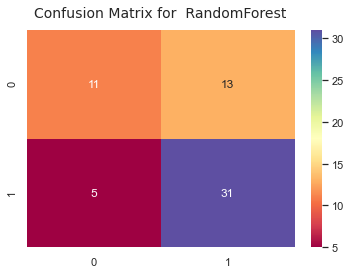

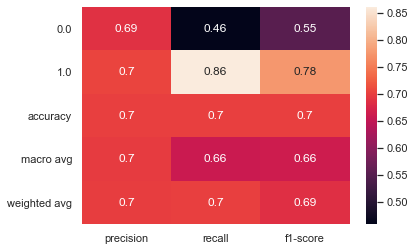

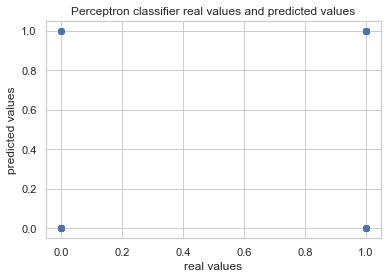

<Figure size 1152x648 with 0 Axes>

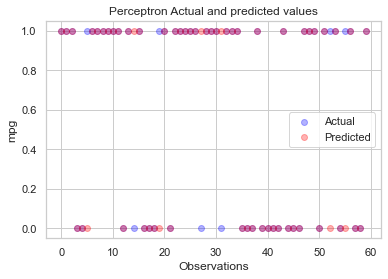

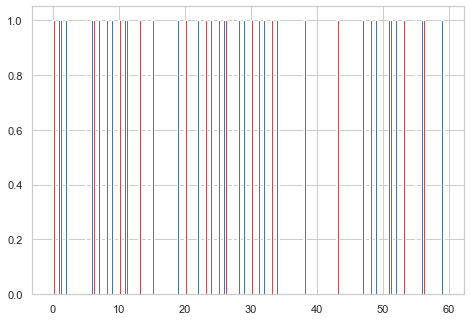

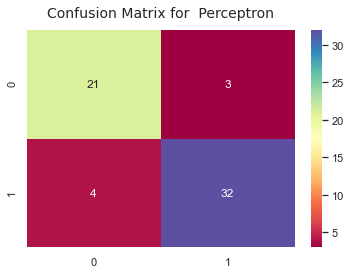

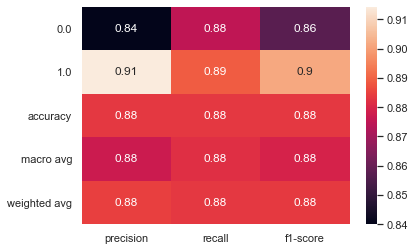

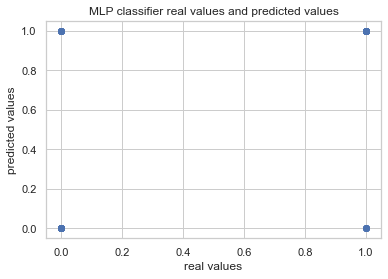

<Figure size 1152x648 with 0 Axes>

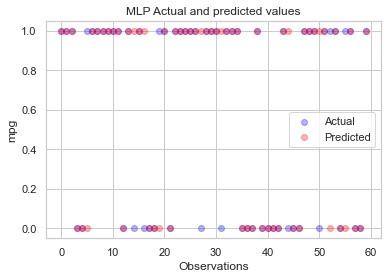

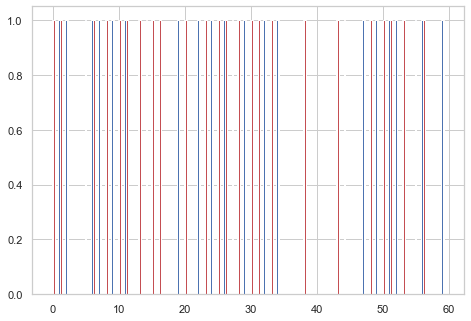

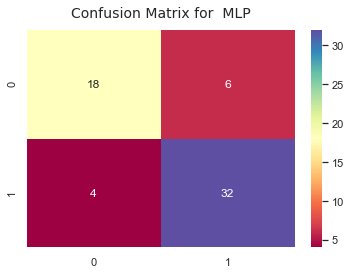

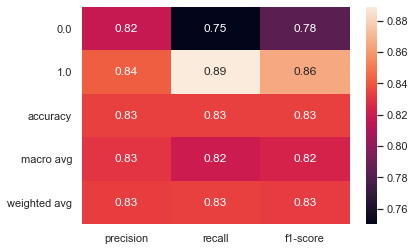

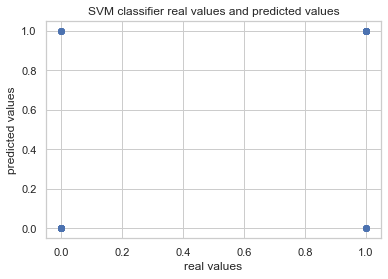

<Figure size 1152x648 with 0 Axes>

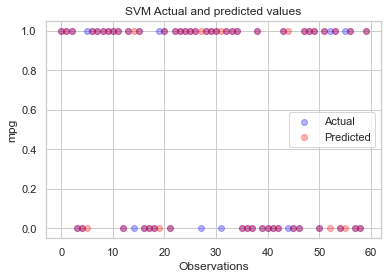

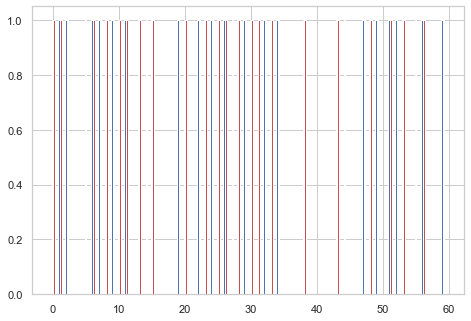

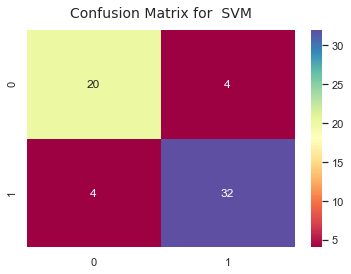

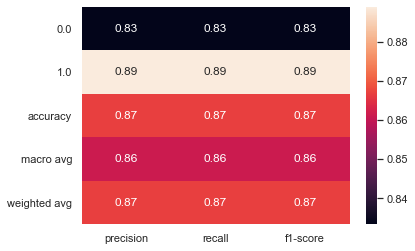

In [110]:
algos = [diagnosis_predictDT, diagnosis_predictKNN, diagnosis_predictPerceptron, diagnosis_predictRandomForest,diagnosis_predictCNN,diagnosis_predictSVM]
names=['DT','KNN','RandomForest','Perceptron','MLP','SVM']
j=0
for i in algos:
        
        
        fig, ax = plt.subplots()
        ax.scatter(y_test,i)
        name=names[j]
        ax.set_title(name+' classifier real values and predicted values')
        ax.set(xlabel='real values', ylabel='predicted values')
        j+=1

        fig = plt.figure(figsize=(16,9))
        _, ax = plt.subplots()

        ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
        ax.scatter(x = range(0, i.size), y=i, c = 'red', label = 'Predicted', alpha = 0.3)


        plt.title(name+' Actual and predicted values')
        plt.xlabel('Observations')
        plt.ylabel('mpg')
        plt.legend()
        plt.show()



        N = y_test.size

        X= np.arange(N) # the x locations for the groups
        width = 0.35
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(X + 0.00,y_test , color = 'b', width = 0.25)
        ax.bar(X + 0.25, i , color = 'r', width = 0.25)




        
        fig=plt.subplots()
        
        
        cf_matrix = confusion_matrix(y_test,i )
        sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
        plt.title("Confusion Matrix for  " +name , fontsize=14, fontname="Helvetica", y=1.03);
        
        fig = plt.figure()
        clf_report = classification_report(y_test,
                                   i,
                                   output_dict=True)
        
        # .iloc[:-1, :] to exclude support
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        


Feature: Age, Score: 0.00000
Feature: Sex, Score: 0.00000
Feature: Chest pain type, Score: 0.13740
Feature: BP, Score: 0.04057
Feature: Cholesterol, Score: 0.02894
Feature: FBS over 120, Score: 0.00000
Feature: EKG results, Score: 0.00000
Feature: Max HR, Score: 0.00000
Feature: Exercise angina, Score: 0.04019
Feature: ST depression, Score: 0.03331
Feature: Slope of ST, Score: 0.00000
Feature: Number of vessels fluro, Score: 0.48116
Feature: Thallium, Score: 0.23842


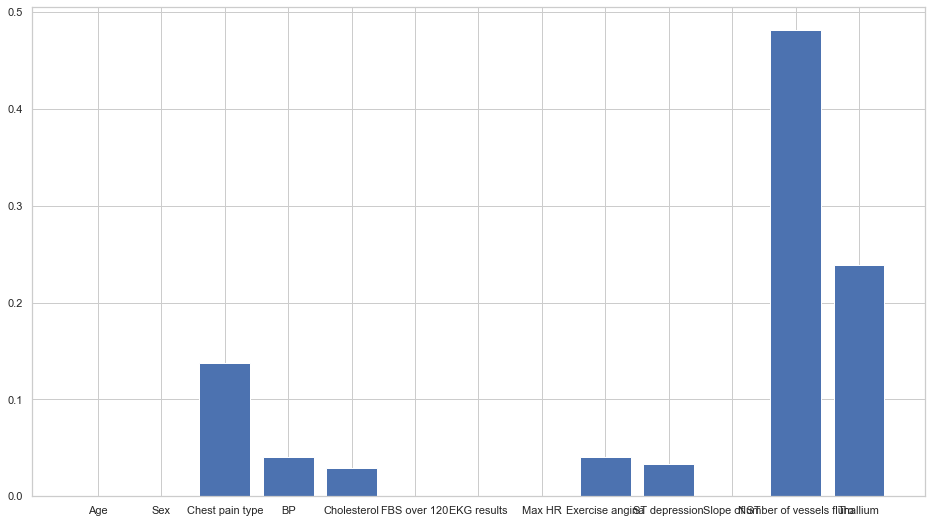

In [111]:
from matplotlib import pyplot
featureName=list(x.columns)
importance = diagnosis_ClassifierDT.feature_importances_
j=-1
# summarize feature importance
for i,v in enumerate(importance):

    j+=1
    print('Feature: %0s, Score: %.5f' % (featureName[j],v))

# plot feature importance
figure=plt.subplots(figsize=(16,9))
pyplot.bar([x for x in range(len(importance))], importance,tick_label=featureName)
pyplot.show()

Feature: Age, Score: 0.09540
Feature: Sex, Score: 0.03685
Feature: Chest pain type, Score: 0.08012
Feature: BP, Score: 0.07537
Feature: Cholesterol, Score: 0.08940
Feature: FBS over 120, Score: 0.01042
Feature: EKG results, Score: 0.02155
Feature: Max HR, Score: 0.10734
Feature: Exercise angina, Score: 0.04206
Feature: ST depression, Score: 0.10713
Feature: Slope of ST, Score: 0.03853
Feature: Number of vessels fluro, Score: 0.16767
Feature: Thallium, Score: 0.12817


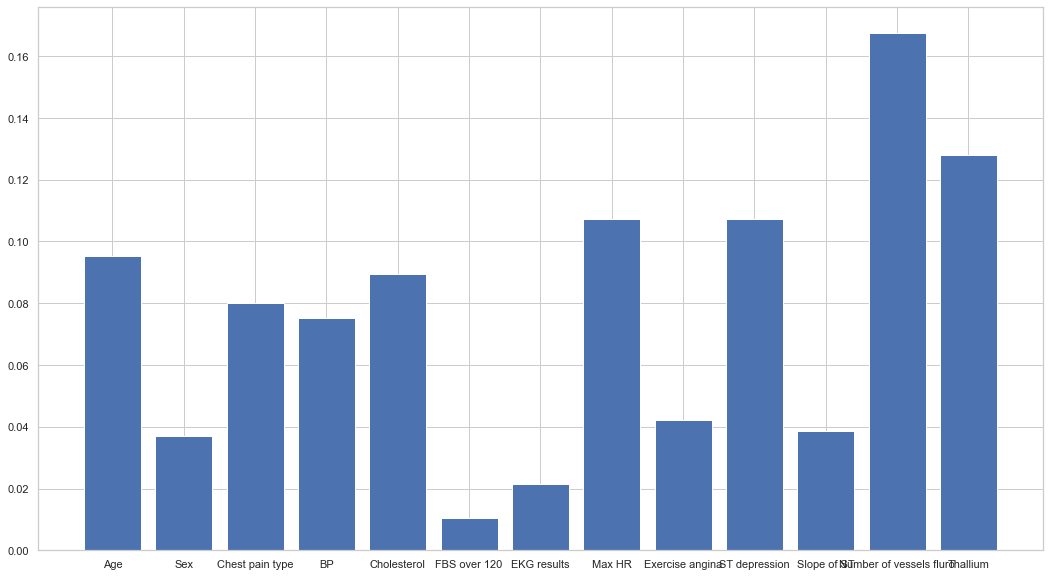

In [112]:
featureName=list(x.columns)
importance = diagnosis_ClassifierRandomForest.feature_importances_
j=-1
# summarize feature importance
for i,v in enumerate(importance):

    j+=1
    print('Feature: %0s, Score: %.5f' % (featureName[j],v))

# plot feature importance
figure=plt.subplots(figsize=(18,10))
pyplot.bar([x for x in range(len(importance))], importance,tick_label=featureName)
pyplot.show()

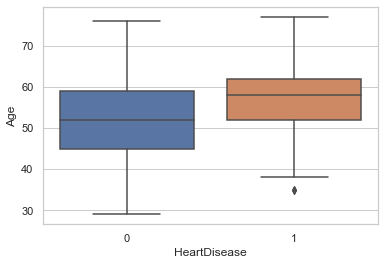

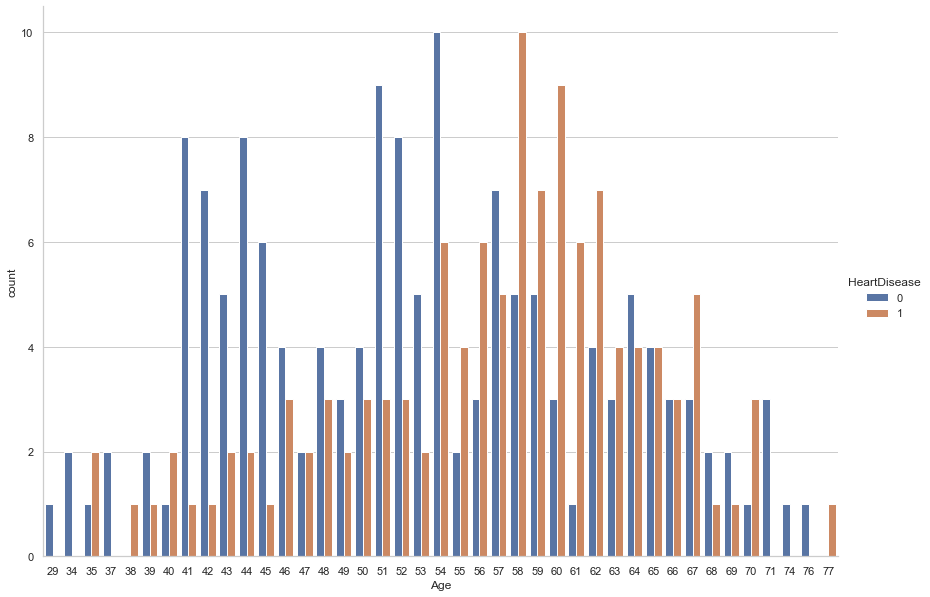

In [113]:
ax=sns.boxplot(x='HeartDisease',y='Age',data=data )

sns.catplot(x='Age',hue='HeartDisease',data=data,kind="count",height=8.27, aspect=11.7/8.27)


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

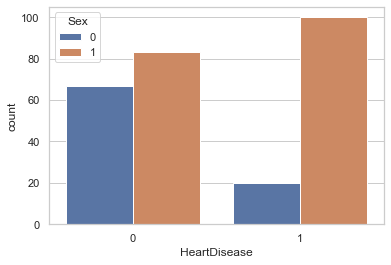

In [114]:
sns.countplot(x=data['HeartDisease'],hue='Sex',data=data)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

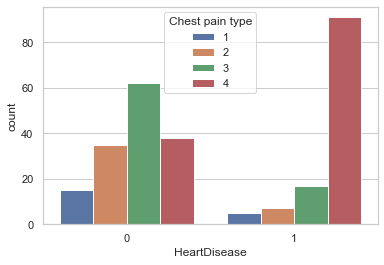

In [115]:
sns.countplot(x=data['HeartDisease'],hue='Chest pain type',data=data)

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

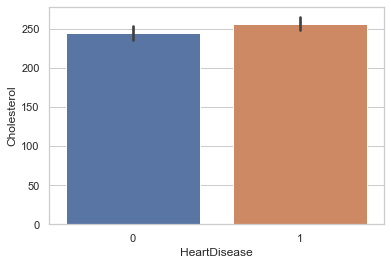

In [116]:
sns.barplot(x=data['HeartDisease'],y=data['Cholesterol'],data=data)

<AxesSubplot:xlabel='HeartDisease', ylabel='Exercise angina'>

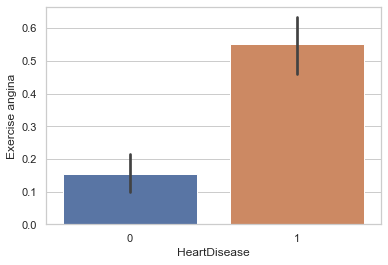

In [117]:
sns.barplot(x=data['HeartDisease'],y=data['Exercise angina'],data=data)